<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [2]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
import models.VAE_models.vqvae as vqvae_module
import models.VAE_models.pixelcnn as pixelcnn_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
importlib.reload(vqvae_module)
importlib.reload(pixelcnn_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer
from models.VAE_models.vqvae import VQVAE
from models.VAE_models.pixelcnn import PixelCNN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [3]:
train_loader, _ = load_cifar10(batch_size=128)

100%|██████████| 170M/170M [00:13<00:00, 12.5MB/s]


In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

In [38]:
model = ConvVAE().to(device)
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/ConvVaeV1"
checkpointer = Checkpointer(checkpoint_dir,"ConvVaeV1",1,False)
train = Train(model,300,train_loader,checkpointer,device)
train.load_checkpoint()


Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/ConvVaeV1/ConvVaeV1_epoch_100.pt


In [39]:
samples = vae_sample(model.decoder)

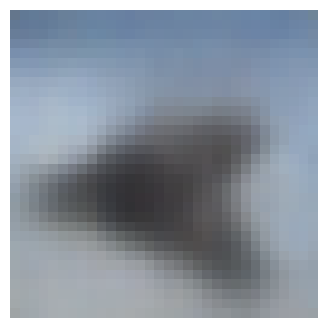

In [54]:
show_img(samples[13])

# **Train Model**

In [5]:
%%capture
vq_model = VQVAE().to(device)
vq_model.apply(WeightsInitializer())

In [6]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/VQVae/Vae"
checkpointer = Checkpointer(checkpoint_dir,"VQVae",1,False)
train = Train(vq_model,300,train_loader,checkpointer,device)
train.load_checkpoint()
# train.train()


Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/VQVae/Vae/VQVae_epoch_300.pt


In [7]:
%%capture
gen_model = PixelCNN(None,vq_model.vq.num_embeddings).to(device)
gen_model.apply(WeightsInitializer())
gen_model.vqvae = vq_model

In [22]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN"
checkpointer = Checkpointer(checkpoint_dir,"pixelCNN",1,False)
train = Train(gen_model,300,train_loader,checkpointer,device)
train.load_checkpoint()
train.train()

Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_200.pt
Epoch: 201  {'pixelcnn_loss': 4.254641649973057}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_201.pt
Epoch: 202  {'pixelcnn_loss': 4.25414134413385}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_202.pt
Epoch: 203  {'pixelcnn_loss': 4.2535915825982835}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_203.pt
Epoch: 204  {'pixelcnn_loss': 4.253263685709375}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_204.pt
Epoch: 205  {'pixelcnn_loss': 4.253315074364547}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_205.pt
Epoch: 206  {'pixelcnn_loss': 4.251867917492566}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/VQVae/pixelCNN/pixelCNN_epoch_206.pt
Epoch: 207  {'pixelcnn_los

[{'pixelcnn_loss': 5.30257511626729},
 {'pixelcnn_loss': 4.994415086858413},
 {'pixelcnn_loss': 4.824037640905746},
 {'pixelcnn_loss': 4.7882576598535715},
 {'pixelcnn_loss': 4.7614755581711865},
 {'pixelcnn_loss': 4.727261011557811},
 {'pixelcnn_loss': 4.6813540714781},
 {'pixelcnn_loss': 4.637505113011431},
 {'pixelcnn_loss': 4.60573842763291},
 {'pixelcnn_loss': 4.584754051149958},
 {'pixelcnn_loss': 4.569402075179703},
 {'pixelcnn_loss': 4.557274865982173},
 {'pixelcnn_loss': 4.546471807962793},
 {'pixelcnn_loss': 4.536181329156432},
 {'pixelcnn_loss': 4.528063830207376},
 {'pixelcnn_loss': 4.520450874972527},
 {'pixelcnn_loss': 4.513319687465268},
 {'pixelcnn_loss': 4.507160906291679},
 {'pixelcnn_loss': 4.502305521074768},
 {'pixelcnn_loss': 4.49609186460295},
 {'pixelcnn_loss': 4.491067527810021},
 {'pixelcnn_loss': 4.485963416526385},
 {'pixelcnn_loss': 4.481785232758583},
 {'pixelcnn_loss': 4.4765847223189175},
 {'pixelcnn_loss': 4.471855520897204},
 {'pixelcnn_loss': 4.467339

In [23]:
images = gen_model.sample()

In [ ]:
images.shape

torch.Size([16, 3, 32, 32])

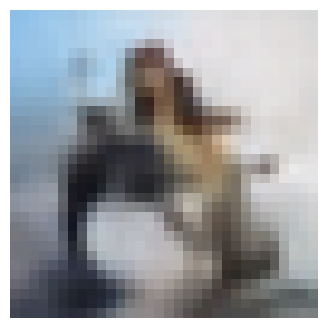

In [50]:
show_img(images[11])

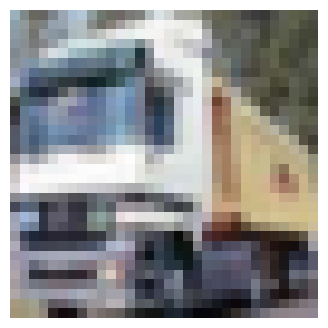

In [18]:
train_dataset = train_loader.dataset
img = train_dataset[1][0]
show_img(img)

In [19]:
# print(img.unsqueeze(0) .shape)
recon, vq_loss, indices = vq_model.forward(img.unsqueeze(0).to(device))

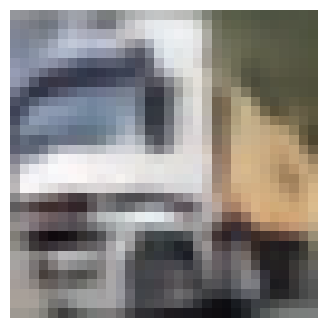

In [20]:
# recon.shape
show_img(recon[0])
# indices.shape

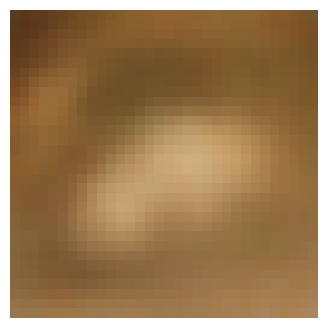

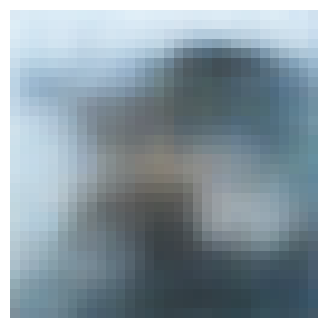

In [ ]:
decoder = model.decoder

x = model.forward(img.unsqueeze(0).to(device))
show_img(x[0])

sample = vae_sample(decoder,1)
show_img(sample[0])